## HW1 for DLCV Fall 2020

Reference: 
- K-Means Tutorial: https://www.kdnuggets.com/2019/08/introduction-image-segmentation-k-means-clustering.html
- U Washington SVD Tutorial: https://www.youtube.com/watch?v=yYdYrAKghF4

No Collaborators for this assignment <br/>
**Yu-Teng Li, Fall 2020**

## Problem 1: K-means

### PART 1

In [291]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as plt_img
from sklearn.cluster import KMeans

%matplotlib inline

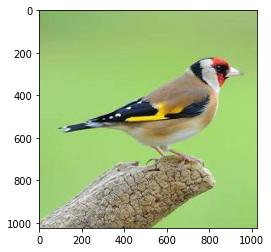

Image dimension:  (1024, 1024, 3) 

Flattened dimension: (1048576, 3) 



In [292]:
# Load in problem set 1 image

cv_image = cv2.imread("../bird.jpg") #default read in the order of BGR
img = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

flatten_image = img.reshape((-1, 3))
flatten_image = np.float32(flatten_image)
print("Image dimension: ", np.shape(img), '\n')
print("Flattened dimension:", np.shape(flatten_image), '\n')

In [227]:
# Run K-means
cluster_k = np.array([2, 4, 8, 16, 32])
segmented = [[0, 0, 0] for _ in range(5)]

attempts = 20
for i in range(len(cluster_k)):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, cluster_k[i], 1.0)
    segmented[i][0], segmented[i][1], segmented[i][2] = cv2.kmeans(flatten_image, cluster_k[i], None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

In [256]:
# Reconstruct
def print_original():
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(img)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    
def print_images(segment, cluster_k):
    compact, labels, centers = segment[0], segment[1], segment[2]
    centers = np.uint8(centers) # Convert back to 8 bit
    
    center_lst = centers[labels.flatten()]
    seg_image = center_lst.reshape((img.shape))

#     figure_size = (10, 30)
    plt.rcParams["figure.figsize"] = [10,10]
    plt.subplot(1,2,2),plt.imshow(seg_image)
    plt.title('Segmented Image when K = %i' % cluster_k), plt.xticks([]), plt.yticks([])
    plt.show()


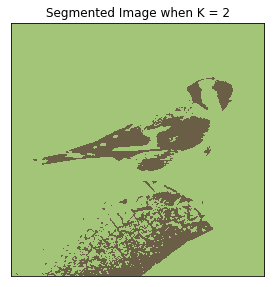

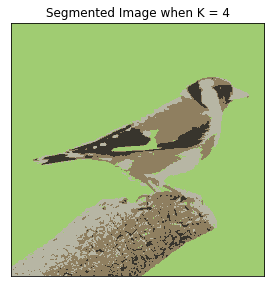

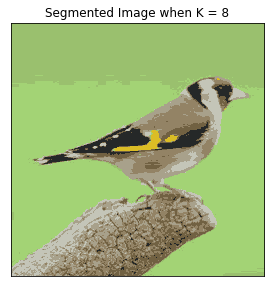

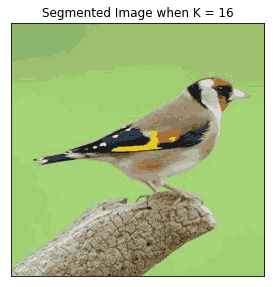

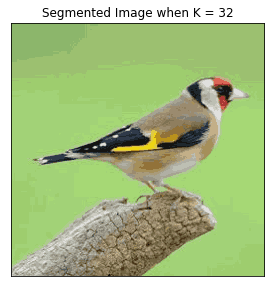

In [257]:
# Print the original picture
# print_original()
# K = 2
print_images(segmented[0], cluster_k[0])
# K = 4
print_images(segmented[1], cluster_k[1])
# K = 8
print_images(segmented[2], cluster_k[2])
# K = 16
print_images(segmented[3], cluster_k[3])
# K = 32
print_images(segmented[4], cluster_k[4])


### PART 2: K-means with Position

In [258]:
# Reshape to (1024, 1024, 5)
counter, img_with_pos = 0, np.zeros((1024, 1024, 5))
for r in range(len(img)):
    for c in range(len(img)):
        img_with_pos[r][c] = np.hstack((img[r][c], [r, c]))
        
flatten_image_with_pos = img_with_pos.reshape((-1, 5))
vectorized = np.float32(flatten_image_with_pos)

In [259]:
vectorized.shape

(1048576, 5)

In [305]:
# Run K-means
segmented_pos = [[0, 0, 0] for _ in range(5)]
for i in range(len(cluster_k)):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, cluster_k[i], 1.0)
    segmented_pos[i][0], segmented_pos[i][1], segmented_pos[i][2] = cv2.kmeans(vectorized, cluster_k[i], None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

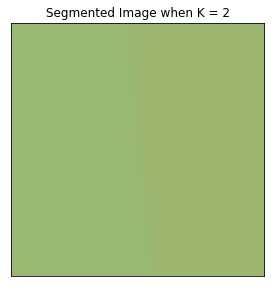

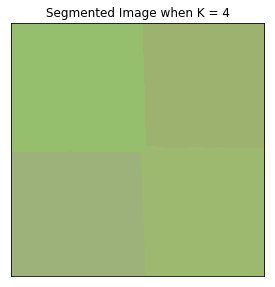

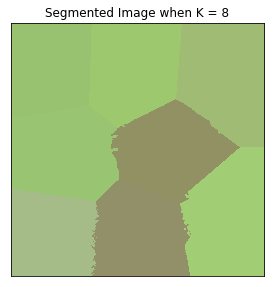

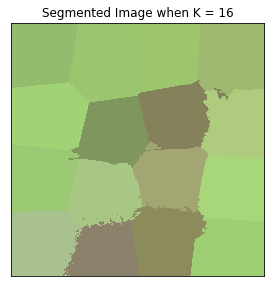

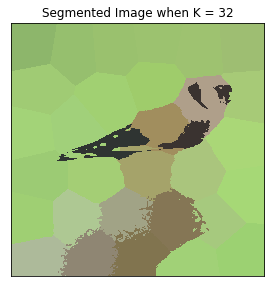

In [306]:
# Preprocess segmented_pos for reconstruction
k_list = [2, 4, 8, 16, 32]
for i in range(len(k_list)):
    k = k_list[i]
    second = [target[:3] for target in segmented_pos[i][2]]
    lst = [segmented_pos[i][0], segmented_pos[i][1], second]
    print_images(lst, k)

### Part 3: Discussion

#### Prompt:
Compare your results obtained in 1. and 2., and briefly explain the differences between the
two methods under the same K. If further improved segmentation results would be desirable,
please provide possible modification or extension to the above feature definition (and visualize
your results).

#### Answer:
Based on my experiment result, the k-means with consideration of position acutally does more poorly in recognizing in separating color segments. This indicates that feature selection can make or break the result with traditional clustering algorithms. For this particular example where we have RGB 3 channels, position pairs (x, y) are not actually that correlated to colors.